In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

gamma = 1.4    # Specific heat ratio for air (assumed constant)
R     = 287.05 # Specific gas constant for dry air [J/(kg·K)]

# Load the data from CSV
file_path = "./E-1.1.revA-3-4-MSN001_Exported_Outputs/"
file_name = "E-1.1.revA-3-4-MSN001_Loads_Export_MPE.csv"
data = pd.read_csv(file_path+file_name)

# Convert velocity to non-pagan units
data['Velocity x (m/s)(J2000)'] = data['Velocity x (km/s)(J2000)'] * 1000
data['Velocity y (m/s)(J2000)'] = data['Velocity y (km/s)(J2000)'] * 1000
data['Velocity z (m/s)(J2000)'] = data['Velocity z (km/s)(J2000)'] * 1000
print(data.columns.tolist())
data

['Flight Time (s)', 'Latitude (deg)', 'Longitude (deg)', 'Altitude (km)', 'Roll (deg)', 'Pitch (deg)', 'Yaw (deg)', 'Omega (x) (Body)', 'Omega (y) (Body)', 'Omega (z) (Body)', 'Velocity x (km/s)(J2000)', 'Velocity y (km/s)(J2000)', 'Velocity z (km/s)(J2000)', 'Thrust (kN)(main engines)', 'Mass (tonnes)', 'Thrust to Effective Weight ratio', 'Mach Number', 'AoA (in pitch)(deg)', 'AoS(yaw)(deg)', 'AoA (total)(deg)', 'Dynamic Pressure (Kpa)', 'Acceleration with Gravity included (m/s^2)(J2000)', 'Acceleration without gravity (m/s^2)(Body)', 'Load_Factor_Axial', 'Velocity x (m/s)(J2000)', 'Velocity y (m/s)(J2000)', 'Velocity z (m/s)(J2000)']


,Flight Time (s),Latitude (deg),Longitude (deg),Altitude (km),Roll (deg),Pitch (deg),Yaw (deg),Omega (x) (Body),Omega (y) (Body),Omega (z) (Body),...,AoA (in pitch)(deg),AoS(yaw)(deg),AoA (total)(deg),Dynamic Pressure (Kpa),Acceleration with Gravity included (m/s^2)(J2000),Acceleration without gravity (m/s^2)(Body),Load_Factor_Axial,Velocity x (m/s)(J2000),Velocity y (m/s)(J2000),Velocity z (m/s)(J2000)
0,0.000000,-19.958112,148.113603,0.031564,0,88.000000,64.000000,0.000000,0.000000,0.000000,...,88.000000,39.148577,88.449103,6.332700,3.763034,13.557232,1.381105,-238.747438,-366.423986,0.561314
1,0.053323,-19.958112,148.113603,0.031569,0,88.000000,64.000000,-0.001356,-0.003532,0.001771,...,83.450435,38.759248,84.897130,6.433182,3.767400,13.561614,1.381551,-238.920159,-366.338459,0.505071
2,0.106647,-19.958112,148.113603,0.031586,0,88.000000,64.000000,-0.001357,-0.003535,0.001772,...,79.041873,38.207778,81.409650,6.583830,3.771772,13.566001,1.381998,-239.093068,-366.252822,0.448752
3,0.159970,-19.958112,148.113603,0.031612,0,88.000000,64.000000,-0.001356,-0.003532,0.001771,...,74.817046,37.514320,78.009997,6.784814,3.776149,13.570395,1.382446,-239.266170,-366.167072,0.392356
4,0.213293,-19.958112,148.113603,0.031650,0,88.000000,64.000000,-0.001357,-0.003532,0.001771,...,70.807360,36.702365,74.717888,7.036303,3.780531,13.574795,1.382894,-239.439462,-366.081208,0.335884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,459.360481,-12.849647,160.598217,219.965800,0,-3.807340,57.480199,0.002115,-0.113275,-0.000919,...,-3.979419,-0.033796,3.979563,0.003770,27.054922,24.848454,2.709565,-2952.779943,-5983.038593,3830.253853
2458,460.164856,-12.822023,160.642307,219.978389,0,-3.844817,57.469144,0.002115,-0.113447,-0.000918,...,-4.004838,-0.033950,4.004981,0.003789,27.204665,25.001699,2.726287,-2952.346013,-6000.977468,3842.672602
2459,460.969231,-12.794314,160.686508,219.989791,0,-3.882294,57.458089,0.002115,-0.113621,-0.000917,...,-4.030446,-0.034103,4.030590,0.003809,27.356308,25.156845,2.743216,-2951.918497,-6019.015882,3855.160770
2460,461.773605,-12.766520,160.730820,220.000018,0,-3.919772,57.447035,0.002116,-0.113796,-0.000916,...,-4.056245,-0.034254,4.056389,0.003829,27.509885,25.313929,2.760354,-2951.497404,-6037.155116,3867.719234


In [2]:
file_name = "E-1.1.revA-3-4-MSN001_Pressure_Export.csv"
pressure_export = pd.read_csv(file_path+file_name)
pressure_export.columns = ["Altitude [km]", "P_inf [kPa]", "rho [kg/m^3]", "Temperature [K]"]
print(pressure_export.columns.tolist())
pressure_export

['Altitude [km]', 'P_inf [kPa]', 'rho [kg/m^3]', 'Temperature [K]']


,Altitude [km],P_inf [kPa],rho [kg/m^3],Temperature [K]
0,0.031564,100946.391704,1.221291e+00,287.944834
1,0.031569,100946.327618,1.221291e+00,287.944799
2,0.031586,100946.135261,1.221289e+00,287.944695
3,0.031612,100945.814483,1.221286e+00,287.944521
4,0.031650,100945.365136,1.221281e+00,287.944277
...,...,...,...,...
2457,219.965800,0.000052,1.417363e-10,898.951608
2458,219.978389,0.000052,1.416851e-10,898.974738
2459,219.989791,0.000052,1.416387e-10,898.995681
2460,220.000018,0.000052,1.415971e-10,899.014463


In [3]:
pressure_export.iloc[1054]

Altitude [km]         11.000240
P_inf [kPa]        22699.103966
rho [kg/m^3]           0.364790
Temperature [K]      216.771956
Name: 1054, dtype: float64

In [4]:
def sutherland_viscosity(T):
    """
    Compute the dynamic viscosity of air using Sutherland's formula.
    
    Parameters:
    T (float): Temperature in Kelvin
    
    Returns:
    float: Dynamic viscosity in Pa·s
    """
    # Sutherland's constant values for air
    T_0 = 273.15    # Reference temperature in K
    mu_0 = 1.716e-5 # Reference dynamic viscosity in Pa·s
    C = 110.4       # Sutherland's constant in K
    
    # Calculate dynamic viscosity using Sutherland's formula
    mu = mu_0 * ((T / T_0) ** 1.5) * ((T_0 + C) / (T + C))
    return mu

temperature = pressure_export['Temperature [K]']  # Temperature in Kelvin
viscosity = sutherland_viscosity(temperature)

In [5]:
data['T']   = pressure_export['Temperature [K]']
data['P']   = pressure_export['P_inf [kPa]']
data['rho'] = pressure_export['rho [kg/m^3]']
data['mu']  = viscosity

In [6]:
def reynolds_number(rho, U, L, T):
    """
    Calculate the Reynolds number given density, velocity, characteristic length, and temperature.
    
    Parameters:
    rho (float): Density in kg/m^3
    U (float): Velocity in m/s
    L (float): Characteristic length in meters
    T (float): Temperature in Kelvin
    
    Returns:
    float: Reynolds number
    """
    # Compute dynamic viscosity using Sutherland's formula
    mu = sutherland_viscosity(T)
    
    # Calculate Reynolds number
    Re = (rho * U * L) / mu
    return Re

rho = pressure_export['rho [kg/m^3]'] 
U   = np.sqrt(data['Velocity x (m/s)(J2000)']**2+data['Velocity y (m/s)(J2000)']**2+data['Velocity z (m/s)(J2000)']**2) # Magnitude Velocity in m/s
L   = 1.0 # Characteristic length in meters
T   = pressure_export['Temperature [K]']

# Compute Reynolds number
Re = reynolds_number(rho, U, L, T)

In [7]:
data['Re'] = Re

In [8]:
qmax_index = data['Dynamic Pressure (Kpa)'].idxmax()
print(qmax_index)

qmax_data = data.iloc[qmax_index]
qmax_time = data['Flight Time (s)'].iloc[qmax_index]

# Get the index of the matching rows
matching_indices = qmax_data.index

print(qmax_data)
#print(f'Matching indices: {matching_indices.tolist()}')

1054
Flight Time (s)                                      6.162419e+01
Latitude (deg)                                      -1.993667e+01
Longitude (deg)                                      1.481571e+02
Altitude (km)                                        1.100024e+01
Roll (deg)                                           0.000000e+00
Pitch (deg)                                          5.447574e+01
Yaw (deg)                                            6.198362e+01
Omega (x) (Body)                                     5.708465e-02
Omega (y) (Body)                                    -6.586018e-01
Omega (z) (Body)                                    -3.785939e-02
Velocity x (km/s)(J2000)                            -7.463573e-01
Velocity y (km/s)(J2000)                            -3.641400e-01
Velocity z (km/s)(J2000)                            -4.743870e-03
Thrust (kN)(main engines)                            5.518443e+02
Mass (tonnes)                                        2.125678e+01
Thrus

In [9]:
def compute_k(Umag, I):
    """
    Computes the turbulence kinetic energy (k) using the formula:
    k = 1.5 * (Umag * I)**2

    Parameters:
    Umag (float): The magnitude of velocity
    I (float): Turbulence intensity

    Returns:
    float: The turbulence kinetic energy (k)
    """
    data['k'] = 1.5 * (Umag * I)**2
    return data['k']

def compute_omega(rho, k, mu_t_over_mu):
    """
    Computes the specific dissipation rate (omega) using the formula:
    omega = (rho * k) / (mu_t_over_mu)

    Parameters:
    rho (float): Density of the fluid
    k (float): Turbulence kinetic energy
    mu_t_over_mu (float): Ratio of turbulent viscosity to molecular viscosity

    Returns:
    float: The specific dissipation rate (omega)
    """
    data['omega'] = (rho * k) / mu_t_over_mu
    return data['omega']

In [10]:
# Calculate turbulence quantities

I = 0.5/100        # Turbulence intensity
mu_t_over_mu = 0.7 # Eddy viscosity ratio for external flows

rho  = pressure_export['rho [kg/m^3]'].iloc[qmax_index]    #0.004388    # kg/m^3
patm = pressure_export['P_inf [kPa]'].iloc[qmax_index]     #313.09*1000 # Pa
Tatm = pressure_export['Temperature [K]'].iloc[qmax_index] #248.58      # K

Umag = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[qmax_index])**2+
               (data['Velocity y (m/s)(J2000)'].iloc[qmax_index])**2+
               (data['Velocity z (m/s)(J2000)'].iloc[qmax_index])**2) # Magnitude Velocity in m/s

k = 1.5 * (Umag * I)**2
omega = (rho * k) / (mu_t_over_mu)

print(rho)
print(Umag)
print(patm)
print(k)
print(omega)

0.364790415011185
830.4635329068823
22699.1039662877
25.862612980806766
13.477761889345944


In [11]:
index = np.where(np.isclose(data['Mach Number'], 1.0, atol=0.005))[0]
print("Index where condition is approximately met:", index)

Index where condition is approximately met: [993]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


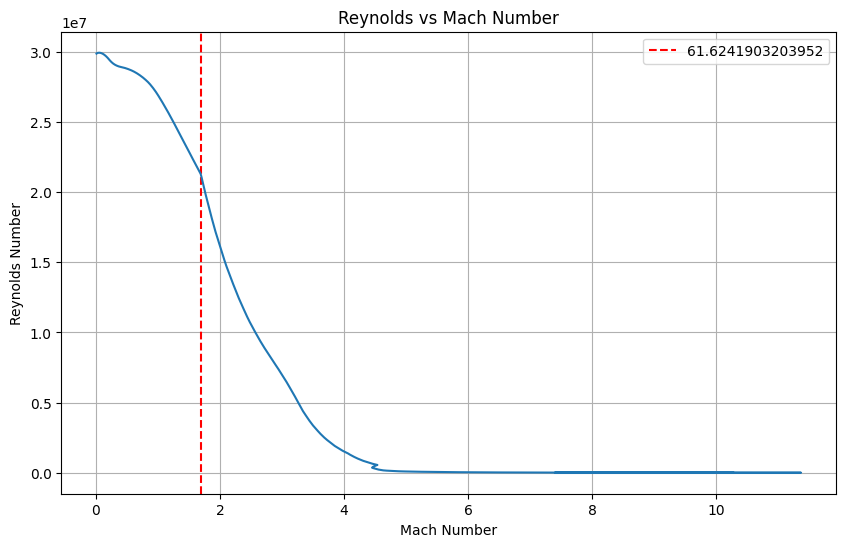

In [12]:
plt.figure(figsize=(10, 6))
plt.axvline(x=data['Mach Number'].iloc[qmax_index], color='red', linestyle='--', label=data['Flight Time (s)'].iloc[qmax_index])
plt.plot(data['Mach Number'], data['Re'])
plt.xlabel('Mach Number')
plt.ylabel('Reynolds Number')
plt.title('Reynolds vs Mach Number')
plt.grid(True)
plt.legend()
plt.savefig('ReVsMach.eps')
plt.show()

In [13]:
# index = np.where(np.isclose(data['Flight Time (s)'], 25, atol=0.01))[0]
# print("Index where condition is approximately met:", index)
# U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
# print(U)
# compute_k(U,I)
# compute_omega(data['rho'], data['k'], mu_t_over_mu)

# flight_time = data['Flight Time (s)'][int(index)]
# mach_number = data['Mach Number'][int(index)]

# filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

# data.to_csv(filename, index=False)
# print(f"Saved {filename}")

# data.iloc[index]

In [14]:
# index = np.where(np.isclose(data['Flight Time (s)'], 100, atol=0.11))[0]
# print("Index where condition is approximately met:", index)
# U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
# print(U)
# compute_k(U,I)
# compute_omega(data['rho'], data['k'], mu_t_over_mu)

# flight_time = data['Flight Time (s)'][int(index)]
# mach_number = data['Mach Number'][int(index)]

# filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

# data.to_csv(filename, index=False)
# print(f"Saved {filename}")

# data.iloc[index]

In [15]:
# index = np.where(np.isclose(data['Flight Time (s)'], 200, atol=0.11))[0]
# print("Index where condition is approximately met:", index)
# U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
# print(U)
# compute_k(U,I)
# compute_omega(data['rho'], data['k'], mu_t_over_mu)

# flight_time = data['Flight Time (s)'][int(index)]
# mach_number = data['Mach Number'][int(index)]

# filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

# data.to_csv(filename, index=False)
# print(f"Saved {filename}")

# data.iloc[index]

In [16]:
# index = np.where(np.isclose(data['Flight Time (s)'], 300, atol=0.11))[0]
# print("Index where condition is approximately met:", index)
# U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
# print(U)
# compute_k(U,I)
# compute_omega(data['rho'], data['k'], mu_t_over_mu)

# flight_time = data['Flight Time (s)'][int(index)]
# mach_number = data['Mach Number'][int(index)]

# filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

# data.to_csv(filename, index=False)
# print(f"Saved {filename}")

# data.iloc[index]

In [17]:
# index = np.where(np.isclose(data['Flight Time (s)'], 400, atol=0.2))[0]
# print("Index where condition is approximately met:", index)
# U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
# print(U)
# compute_k(U,I)
# compute_omega(data['rho'], data['k'], mu_t_over_mu)

# flight_time = data['Flight Time (s)'][int(index)]
# mach_number = data['Mach Number'][int(index)]

# filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

# data.to_csv(filename, index=False)
# print(f"Saved {filename}")

# data.iloc[index]

In [18]:
index = np.where(np.isclose(data['Mach Number'], 0.60, atol=0.0051))[0]
print("Index where condition is approximately met:", index)
U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
print(U)
compute_k(U,I)
compute_omega(data['rho'], data['k'], mu_t_over_mu)

flight_time = data['Flight Time (s)'][int(index)]
mach_number = data['Mach Number'][int(index)]
print("AoA",data['AoA (total)(deg)'][int(index)])

filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

data.to_csv(filename, index=False)
print(f"Saved {filename}")

data.iloc[index]

Index where condition is approximately met: [946]
946    528.686448
dtype: float64
AoA 0.309493874799517
Saved Time_34.253_Mach_0.602.csv


/tmp/ipykernel_8304/2565433886.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flight_time = data['Flight Time (s)'][int(index)]
/tmp/ipykernel_8304/2565433886.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mach_number = data['Mach Number'][int(index)]
/tmp/ipykernel_8304/2565433886.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("AoA",data['AoA (total)(deg)'][int(index)])


,Flight Time (s),Latitude (deg),Longitude (deg),Altitude (km),Roll (deg),Pitch (deg),Yaw (deg),Omega (x) (Body),Omega (y) (Body),Omega (z) (Body),...,Velocity x (m/s)(J2000),Velocity y (m/s)(J2000),Velocity z (m/s)(J2000),T,P,rho,mu,Re,k,omega
946,34.252721,-19.955642,148.118341,2.905098,0,72.568279,63.568303,0.059104,-0.669329,-0.016175,...,-425.353602,-311.936714,-35.765355,269.275486,70970.725973,0.918164,0.000017,2.860871e+07,10.481601,13.748326


In [19]:
index = np.where(np.isclose(data['Mach Number'], 0.70, atol=0.0051))[0]
print("Index where condition is approximately met:", index)
U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
print(U)
compute_k(U,I)
compute_omega(data['rho'], data['k'], mu_t_over_mu)

flight_time = data['Flight Time (s)'][int(index)]
mach_number = data['Mach Number'][int(index)]
print("AoA",data['AoA (total)(deg)'][int(index)])

filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

data.to_csv(filename, index=False)
print(f"Saved {filename}")

data.iloc[index]

Index where condition is approximately met: [960]
960    555.487206
dtype: float64
AoA 0.376157573040646


/tmp/ipykernel_8304/2309227091.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flight_time = data['Flight Time (s)'][int(index)]
/tmp/ipykernel_8304/2309227091.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mach_number = data['Mach Number'][int(index)]
/tmp/ipykernel_8304/2309227091.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("AoA",data['AoA (total)(deg)'][int(index)])


Saved Time_37.707_Mach_0.701.csv


,Flight Time (s),Latitude (deg),Longitude (deg),Altitude (km),Roll (deg),Pitch (deg),Yaw (deg),Omega (x) (Body),Omega (y) (Body),Omega (z) (Body),...,Velocity x (m/s)(J2000),Velocity y (m/s)(J2000),Velocity z (m/s)(J2000),T,P,rho,mu,Re,k,omega
960,37.707373,-19.954588,148.120458,3.601309,0,70.270362,63.352455,0.058353,-0.669492,-0.018507,...,-458.152656,-312.028961,-36.056998,264.754748,64928.066444,0.854332,0.000017,2.834705e+07,11.571226,14.122379


In [20]:
index = np.where(np.isclose(data['Mach Number'], 0.80, atol=0.0051))[0]
print("Index where condition is approximately met:", index)
U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
print(U)
compute_k(U,I)
compute_omega(data['rho'], data['k'], mu_t_over_mu)

flight_time = data['Flight Time (s)'][int(index)]
mach_number = data['Mach Number'][int(index)]
print("AoA",data['AoA (total)(deg)'][int(index)])

filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

data.to_csv(filename, index=False)
print(f"Saved {filename}")

data.iloc[index]

Index where condition is approximately met: [972]
972    583.59772
dtype: float64
AoA 0.613315584811693
Saved Time_40.896_Mach_0.803.csv


/tmp/ipykernel_8304/464902567.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flight_time = data['Flight Time (s)'][int(index)]
/tmp/ipykernel_8304/464902567.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mach_number = data['Mach Number'][int(index)]
/tmp/ipykernel_8304/464902567.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("AoA",data['AoA (total)(deg)'][int(index)])


,Flight Time (s),Latitude (deg),Longitude (deg),Altitude (km),Roll (deg),Pitch (deg),Yaw (deg),Omega (x) (Body),Omega (y) (Body),Omega (z) (Body),...,Velocity x (m/s)(J2000),Velocity y (m/s)(J2000),Velocity z (m/s)(J2000),T,P,rho,mu,Re,k,omega
972,40.896282,-19.953346,148.12297,4.32589,0,68.149207,63.153211,0.057572,-0.669667,-0.020624,...,-491.031313,-313.381532,-35.58882,260.050838,59089.844455,0.791576,0.000017,2.799057e+07,12.771986,14.442846


In [21]:
index = np.where(np.isclose(data['Mach Number'], 0.9, atol=0.005))[0]
print("Index where condition is approximately met:", index)
U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
print(U)
compute_k(U,I)
compute_omega(data['rho'], data['k'], mu_t_over_mu)

flight_time = data['Flight Time (s)'][int(index)]
mach_number = data['Mach Number'][int(index)]
print("AoA",data['AoA (total)(deg)'][int(index)])

filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

data.to_csv(filename, index=False)
print(f"Saved {filename}")

data.iloc[index]

Index where condition is approximately met: [983]
983    611.761912
dtype: float64
AoA 0.655708654147359


/tmp/ipykernel_8304/2225692251.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flight_time = data['Flight Time (s)'][int(index)]
/tmp/ipykernel_8304/2225692251.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mach_number = data['Mach Number'][int(index)]
/tmp/ipykernel_8304/2225692251.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("AoA",data['AoA (total)(deg)'][int(index)])


Saved Time_43.819_Mach_0.903.csv


,Flight Time (s),Latitude (deg),Longitude (deg),Altitude (km),Roll (deg),Pitch (deg),Yaw (deg),Omega (x) (Body),Omega (y) (Body),Omega (z) (Body),...,Velocity x (m/s)(J2000),Velocity y (m/s)(J2000),Velocity z (m/s)(J2000),T,P,rho,mu,Re,k,omega
983,43.819448,-19.951952,148.125807,5.061724,0,66.204816,62.97057,0.056784,-0.669846,-0.022534,...,-522.750997,-315.915362,-34.373191,255.274969,53604.705599,0.731531,0.000016,2.752075e+07,14.034474,14.666638


In [22]:
index = np.where(np.isclose(data['Mach Number'], 0.95, atol=0.005))[0]
print("Index where condition is approximately met:", index)
U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
print(U)
compute_k(U,I)
compute_omega(data['rho'], data['k'], mu_t_over_mu)

flight_time = data['Flight Time (s)'][int(index)]
mach_number = data['Mach Number'][int(index)]
print("AoA",data['AoA (total)(deg)'][int(index)])

filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

data.to_csv(filename, index=False)
print(f"Saved {filename}")

data.iloc[index]

Index where condition is approximately met: [988]
988    625.088142
dtype: float64
AoA 0.571391564530969


/tmp/ipykernel_8304/3975401025.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flight_time = data['Flight Time (s)'][int(index)]
/tmp/ipykernel_8304/3975401025.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mach_number = data['Mach Number'][int(index)]
/tmp/ipykernel_8304/3975401025.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("AoA",data['AoA (total)(deg)'][int(index)])


Saved Time_45.148_Mach_0.949.csv


,Flight Time (s),Latitude (deg),Longitude (deg),Altitude (km),Roll (deg),Pitch (deg),Yaw (deg),Omega (x) (Body),Omega (y) (Body),Omega (z) (Body),...,Velocity x (m/s)(J2000),Velocity y (m/s)(J2000),Velocity z (m/s)(J2000),T,P,rho,mu,Re,k,omega
988,45.14816,-19.951231,148.127278,5.418713,0,65.321001,62.887551,0.056403,-0.669933,-0.023391,...,-537.364562,-317.574396,-33.481586,252.958367,51096.82681,0.703692,0.000016,2.724884e+07,14.652569,14.729854


In [23]:
index = np.where(np.isclose(data['Mach Number'], 1.0, atol=0.005))[0]
print("Index where condition is approximately met:", index)
U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
print(U)
compute_k(U,I)
compute_omega(data['rho'], data['k'], mu_t_over_mu)

flight_time = data['Flight Time (s)'][int(index)]
mach_number = data['Mach Number'][int(index)]
print("AoA",data['AoA (total)(deg)'][int(index)])

filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

data.to_csv(filename, index=False)
print(f"Saved {filename}")

data.iloc[index]

Index where condition is approximately met: [993]
993    638.682042
dtype: float64
AoA 0.570281336792666


/tmp/ipykernel_8304/3728231501.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flight_time = data['Flight Time (s)'][int(index)]
/tmp/ipykernel_8304/3728231501.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mach_number = data['Mach Number'][int(index)]
/tmp/ipykernel_8304/3728231501.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("AoA",data['AoA (total)(deg)'][int(index)])


Saved Time_46.477_Mach_0.996.csv


,Flight Time (s),Latitude (deg),Longitude (deg),Altitude (km),Roll (deg),Pitch (deg),Yaw (deg),Omega (x) (Body),Omega (y) (Body),Omega (z) (Body),...,Velocity x (m/s)(J2000),Velocity y (m/s)(J2000),Velocity z (m/s)(J2000),T,P,rho,mu,Re,k,omega
993,46.476872,-19.950453,148.128869,5.789479,0,64.437187,62.804533,0.056009,-0.670023,-0.024241,...,-552.038986,-319.561768,-32.372598,250.552627,48593.880737,0.675648,0.000016,2.693825e+07,15.296803,14.764647


In [24]:
index = np.where(np.isclose(data['Mach Number'], 1.05, atol=0.001))[0]
print("Index where condition is approximately met:", index)
U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
print(U)
compute_k(U,I)
compute_omega(data['rho'], data['k'], mu_t_over_mu)

flight_time = data['Flight Time (s)'][int(index)]
mach_number = data['Mach Number'][int(index)]
print("AoA",data['AoA (total)(deg)'][int(index)])

filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

data.to_csv(filename, index=False)
print(f"Saved {filename}")

data.iloc[index]

Index where condition is approximately met: [1000]
1000    654.091482
dtype: float64
AoA 0.524965320759218


/tmp/ipykernel_8304/3621030323.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flight_time = data['Flight Time (s)'][int(index)]
/tmp/ipykernel_8304/3621030323.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mach_number = data['Mach Number'][int(index)]
/tmp/ipykernel_8304/3621030323.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("AoA",data['AoA (total)(deg)'][int(index)])


Saved Time_47.940_Mach_1.049.csv


,Flight Time (s),Latitude (deg),Longitude (deg),Altitude (km),Roll (deg),Pitch (deg),Yaw (deg),Omega (x) (Body),Omega (y) (Body),Omega (z) (Body),...,Velocity x (m/s)(J2000),Velocity y (m/s)(J2000),Velocity z (m/s)(J2000),T,P,rho,mu,Re,k,omega
1000,47.940475,-19.949527,148.130765,6.213587,0,63.46521,62.731809,0.030145,-0.66776,-0.0128,...,-568.435541,-322.119611,-30.913734,247.801124,45853.874155,0.64463,0.000016,2.655728e+07,16.043838,14.774772


In [25]:
index = np.where(np.isclose(data['Mach Number'], 1.10, atol=0.0051))[0]
print("Index where condition is approximately met:", index)
U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
print(U)
compute_k(U,I)
compute_omega(data['rho'], data['k'], mu_t_over_mu)

flight_time = data['Flight Time (s)'][int(index)]
mach_number = data['Mach Number'][int(index)]
print("AoA",data['AoA (total)(deg)'][int(index)])

filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

data.to_csv(filename, index=False)
print(f"Saved {filename}")

data.iloc[index]

Index where condition is approximately met: [1006]
1006    670.072427
dtype: float64
AoA 0.556025036295372


/tmp/ipykernel_8304/3540681381.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flight_time = data['Flight Time (s)'][int(index)]
/tmp/ipykernel_8304/3540681381.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mach_number = data['Mach Number'][int(index)]
/tmp/ipykernel_8304/3540681381.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("AoA",data['AoA (total)(deg)'][int(index)])


Saved Time_49.400_Mach_1.105.csv


,Flight Time (s),Latitude (deg),Longitude (deg),Altitude (km),Roll (deg),Pitch (deg),Yaw (deg),Omega (x) (Body),Omega (y) (Body),Omega (z) (Body),...,Velocity x (m/s)(J2000),Velocity y (m/s)(J2000),Velocity z (m/s)(J2000),T,P,rho,mu,Re,k,omega
1006,49.400039,-19.948528,148.132811,6.65297,0,62.497778,62.681625,0.030141,-0.667887,-0.013188,...,-585.232396,-325.031056,-29.238884,244.950909,43148.865524,0.61366,0.000016,2.614275e+07,16.83739,14.760628


In [26]:
index = np.where(np.isclose(data['Mach Number'], 1.15, atol=0.004))[0]
print("Index where condition is approximately met:", index)
U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
print(U)
compute_k(U,I)
compute_omega(data['rho'], data['k'], mu_t_over_mu)

flight_time = data['Flight Time (s)'][int(index)]
mach_number = data['Mach Number'][int(index)]
print("AoA",data['AoA (total)(deg)'][int(index)])

filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

data.to_csv(filename, index=False)
print(f"Saved {filename}")

data.iloc[index]

Index where condition is approximately met: [1010]
1010    682.096906
dtype: float64


/tmp/ipykernel_8304/1458898166.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flight_time = data['Flight Time (s)'][int(index)]
/tmp/ipykernel_8304/1458898166.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mach_number = data['Mach Number'][int(index)]
/tmp/ipykernel_8304/1458898166.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("AoA",data['AoA (total)(deg)'][int(index)])


AoA 0.542572214792121
Saved Time_50.463_Mach_1.147.csv


,Flight Time (s),Latitude (deg),Longitude (deg),Altitude (km),Roll (deg),Pitch (deg),Yaw (deg),Omega (x) (Body),Omega (y) (Body),Omega (z) (Body),...,Velocity x (m/s)(J2000),Velocity y (m/s)(J2000),Velocity z (m/s)(J2000),T,P,rho,mu,Re,k,omega
1010,50.463009,-19.947751,148.134404,6.983379,0,61.793217,62.645076,0.029953,-0.66797,-0.013543,...,-597.74634,-327.381511,-27.872002,242.80785,41201.327746,0.591134,0.000016,2.581851e+07,17.447107,14.733695


In [27]:
index = np.where(np.isclose(data['Mach Number'], 1.20, atol=0.0051))[0]
print("Index where condition is approximately met:", index)
U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
print(U)
compute_k(U,I)
compute_omega(data['rho'], data['k'], mu_t_over_mu)

flight_time = data['Flight Time (s)'][int(index)]
mach_number = data['Mach Number'][int(index)]
print("AoA",data['AoA (total)(deg)'][int(index)])

filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

data.to_csv(filename, index=False)
print(f"Saved {filename}")

data.iloc[index]

Index where condition is approximately met: [1015]
1015    697.579022
dtype: float64
AoA 0.558797941362724


/tmp/ipykernel_8304/992199559.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flight_time = data['Flight Time (s)'][int(index)]
/tmp/ipykernel_8304/992199559.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mach_number = data['Mach Number'][int(index)]
/tmp/ipykernel_8304/992199559.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("AoA",data['AoA (total)(deg)'][int(index)])


Saved Time_51.792_Mach_1.201.csv


,Flight Time (s),Latitude (deg),Longitude (deg),Altitude (km),Roll (deg),Pitch (deg),Yaw (deg),Omega (x) (Body),Omega (y) (Body),Omega (z) (Body),...,Velocity x (m/s)(J2000),Velocity y (m/s)(J2000),Velocity z (m/s)(J2000),T,P,rho,mu,Re,k,omega
1015,51.791721,-19.94672,148.136522,7.408822,0,60.912517,62.599391,0.029711,-0.668078,-0.013983,...,-613.720626,-330.588197,-25.979399,240.048722,38799.362444,0.563071,0.000015,2.538600e+07,18.248118,14.678546


In [28]:
index = np.where(np.isclose(data['Mach Number'], 1.30, atol=0.0051))[0]
print("Index where condition is approximately met:", index)
U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
print(U)
compute_k(U,I)
compute_omega(data['rho'], data['k'], mu_t_over_mu)

flight_time = data['Flight Time (s)'][int(index)]
mach_number = data['Mach Number'][int(index)]
print("AoA",data['AoA (total)(deg)'][int(index)])

filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

data.to_csv(filename, index=False)
print(f"Saved {filename}")

data.iloc[index]

Index where condition is approximately met: [1026]
1026    726.73742
dtype: float64
AoA 0.451014491662057


/tmp/ipykernel_8304/2354907023.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flight_time = data['Flight Time (s)'][int(index)]
/tmp/ipykernel_8304/2354907023.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mach_number = data['Mach Number'][int(index)]
/tmp/ipykernel_8304/2354907023.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("AoA",data['AoA (total)(deg)'][int(index)])


Saved Time_54.183_Mach_1.304.csv


,Flight Time (s),Latitude (deg),Longitude (deg),Altitude (km),Roll (deg),Pitch (deg),Yaw (deg),Omega (x) (Body),Omega (y) (Body),Omega (z) (Body),...,Velocity x (m/s)(J2000),Velocity y (m/s)(J2000),Velocity z (m/s)(J2000),T,P,rho,mu,Re,k,omega
1026,54.183403,-19.944683,148.140705,8.209858,0,59.330029,62.507581,0.060274,-0.657856,-0.03305,...,-643.422691,-337.149402,-22.018141,234.854757,34585.461048,0.513017,0.000015,2.453086e+07,19.805523,14.515108


In [29]:
index = np.where(np.isclose(data['Mach Number'], 1.40, atol=0.0051))[0]
print("Index where condition is approximately met:", index)
U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
print(U)
compute_k(U,I)
compute_omega(data['rho'], data['k'], mu_t_over_mu)

flight_time = data['Flight Time (s)'][int(index)]
mach_number = data['Mach Number'][int(index)]
print("AoA",data['AoA (total)(deg)'][int(index)])

filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

data.to_csv(filename, index=False)
print(f"Saved {filename}")

data.iloc[index]

Index where condition is approximately met: [1034]
1034    754.238313
dtype: float64
AoA 0.472445379227795


/tmp/ipykernel_8304/4181340376.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flight_time = data['Flight Time (s)'][int(index)]
/tmp/ipykernel_8304/4181340376.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mach_number = data['Mach Number'][int(index)]
/tmp/ipykernel_8304/4181340376.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("AoA",data['AoA (total)(deg)'][int(index)])


Saved Time_56.309_Mach_1.403.csv


,Flight Time (s),Latitude (deg),Longitude (deg),Altitude (km),Roll (deg),Pitch (deg),Yaw (deg),Omega (x) (Body),Omega (y) (Body),Omega (z) (Body),...,Velocity x (m/s)(J2000),Velocity y (m/s)(J2000),Velocity z (m/s)(J2000),T,P,rho,mu,Re,k,omega
1034,56.309342,-19.942666,148.144848,8.960124,0,57.943088,62.357878,0.059407,-0.658051,-0.034457,...,-671.071734,-343.829042,-17.881566,229.991174,30983.263798,0.469304,0.000015,2.369389e+07,21.332829,14.302245


In [30]:
index = np.where(np.isclose(data['Mach Number'], 1.50, atol=0.0051))[0]
print("Index where condition is approximately met:", index)
U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
print(U)
compute_k(U,I)
compute_omega(data['rho'], data['k'], mu_t_over_mu)

flight_time = data['Flight Time (s)'][int(index)]
mach_number = data['Mach Number'][int(index)]
print("AoA",data['AoA (total)(deg)'][int(index)])

filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

data.to_csv(filename, index=False)
print(f"Saved {filename}")

data.iloc[index]

Index where condition is approximately met: [1041]
1041    779.667749
dtype: float64
AoA 0.42195005985858
Saved Time_58.170_Mach_1.497.csv


/tmp/ipykernel_8304/286168118.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flight_time = data['Flight Time (s)'][int(index)]
/tmp/ipykernel_8304/286168118.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mach_number = data['Mach Number'][int(index)]
/tmp/ipykernel_8304/286168118.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("AoA",data['AoA (total)(deg)'][int(index)])


,Flight Time (s),Latitude (deg),Longitude (deg),Altitude (km),Roll (deg),Pitch (deg),Yaw (deg),Omega (x) (Body),Omega (y) (Body),Omega (z) (Body),...,Velocity x (m/s)(J2000),Velocity y (m/s)(J2000),Velocity z (m/s)(J2000),T,P,rho,mu,Re,k,omega
1041,58.169539,-19.94073,148.148824,9.646972,0,56.729514,62.226888,0.058619,-0.658233,-0.035667,...,-696.385198,-350.34266,-13.765038,225.539701,27958.534265,0.431846,0.000015,2.290489e+07,22.795567,14.063116


In [31]:
index = data['Dynamic Pressure (Kpa)'].idxmax()
print("Index where condition is approximately met:", index)
U = np.sqrt((data['Velocity x (m/s)(J2000)'].iloc[index])**2+(data['Velocity y (m/s)(J2000)'].iloc[index])**2+(data['Velocity z (m/s)(J2000)'].iloc[index])**2) # Magnitude Velocity in m/s
print(U)
compute_k(U,I)
compute_omega(data['rho'], data['k'], mu_t_over_mu)

flight_time = data['Flight Time (s)'][int(index)]
mach_number = data['Mach Number'][int(index)]
print("AoA",data['AoA (total)(deg)'][int(index)])

filename = f"Time_{flight_time:.3f}_Mach_{mach_number:.3f}.csv"

data.to_csv(filename, index=False)
print(f"Saved {filename}")

data.iloc[index]

Index where condition is approximately met: 1054
830.4635329068823
AoA 0.425803129036908
Saved Time_61.624_Mach_1.688.csv


Flight Time (s)                                      6.162419e+01
Latitude (deg)                                      -1.993667e+01
Longitude (deg)                                      1.481571e+02
Altitude (km)                                        1.100024e+01
Roll (deg)                                           0.000000e+00
Pitch (deg)                                          5.447574e+01
Yaw (deg)                                            6.198362e+01
Omega (x) (Body)                                     5.708465e-02
Omega (y) (Body)                                    -6.586018e-01
Omega (z) (Body)                                    -3.785939e-02
Velocity x (km/s)(J2000)                            -7.463573e-01
Velocity y (km/s)(J2000)                            -3.641400e-01
Velocity z (km/s)(J2000)                            -4.743870e-03
Thrust (kN)(main engines)                            5.518443e+02
Mass (tonnes)                                        2.125678e+01
Thrust to 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


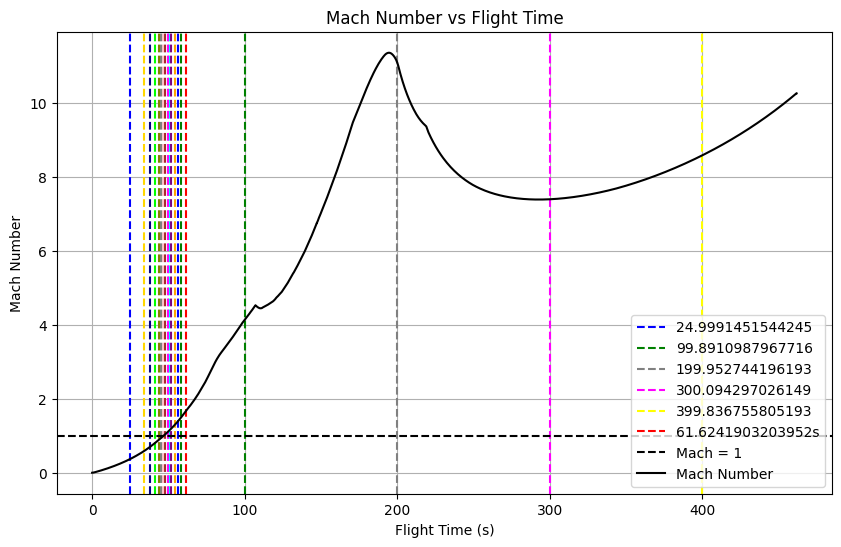

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


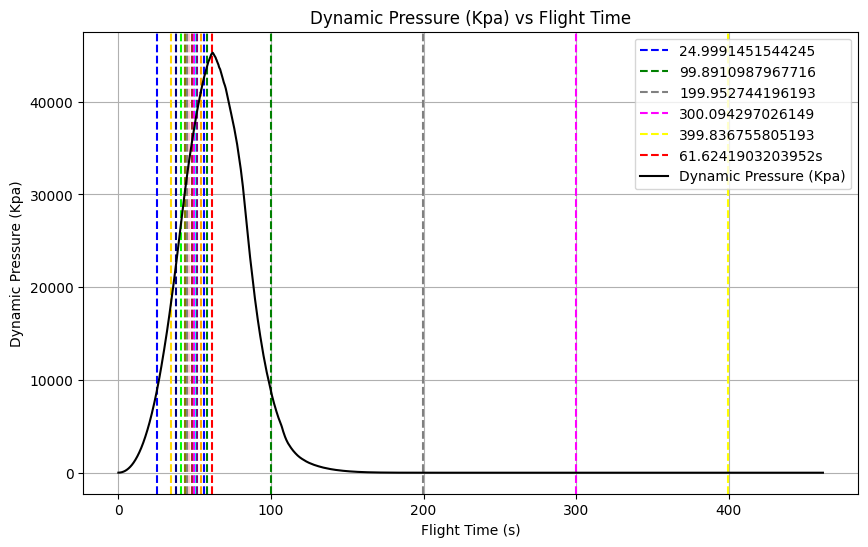

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


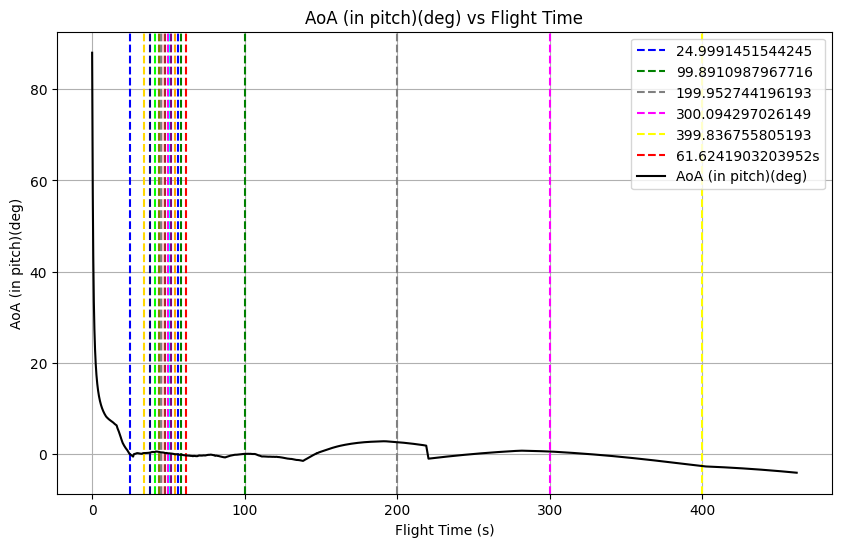

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


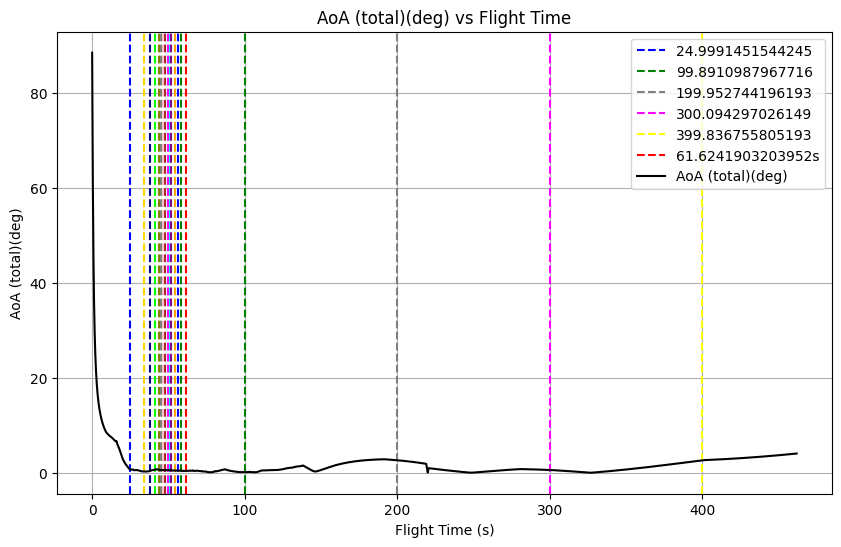

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


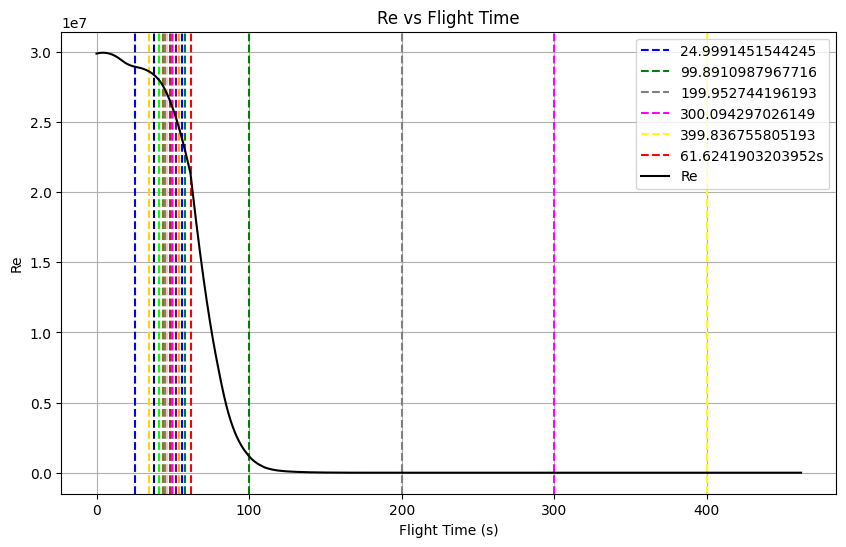

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


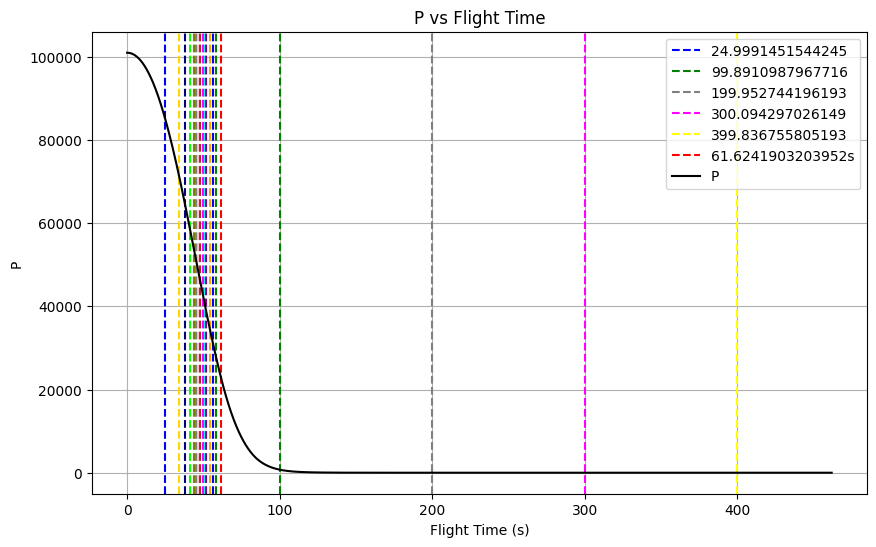

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


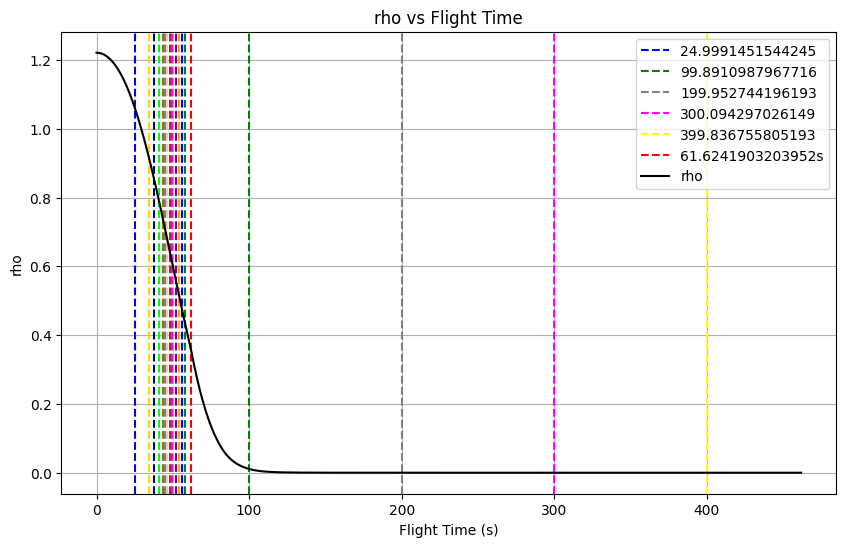

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


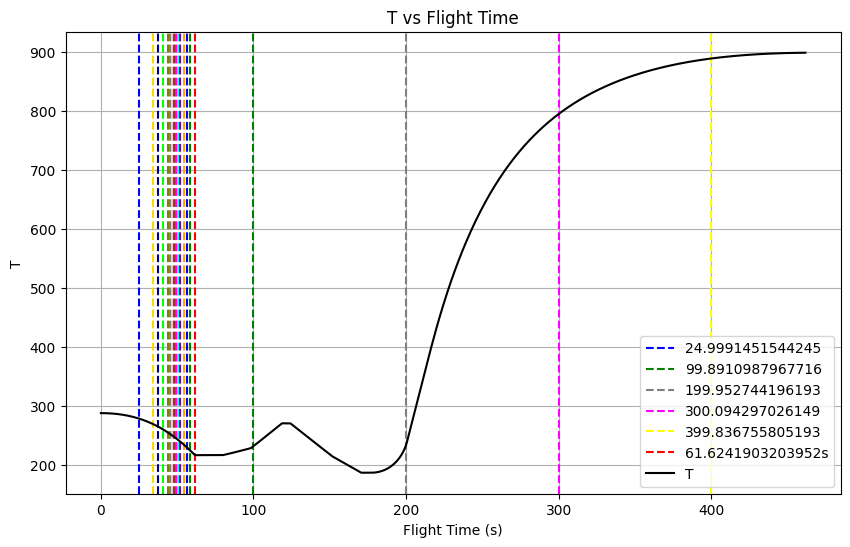

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


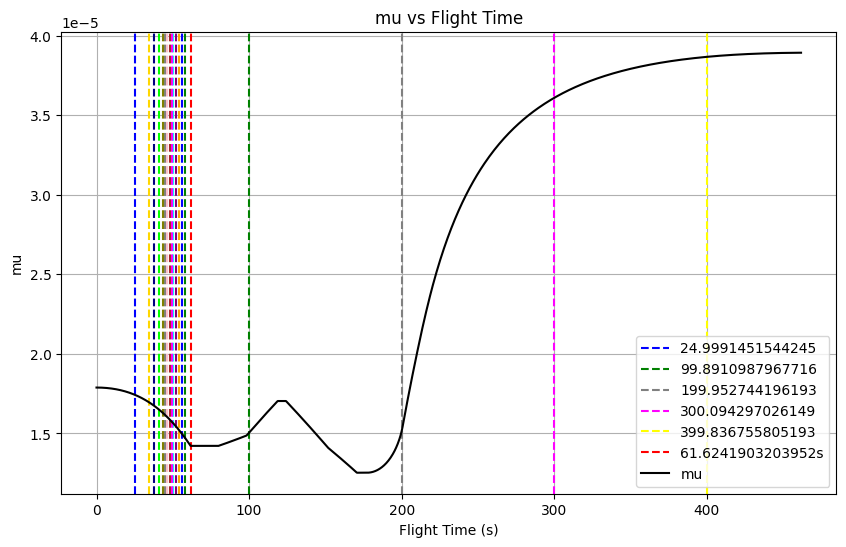

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


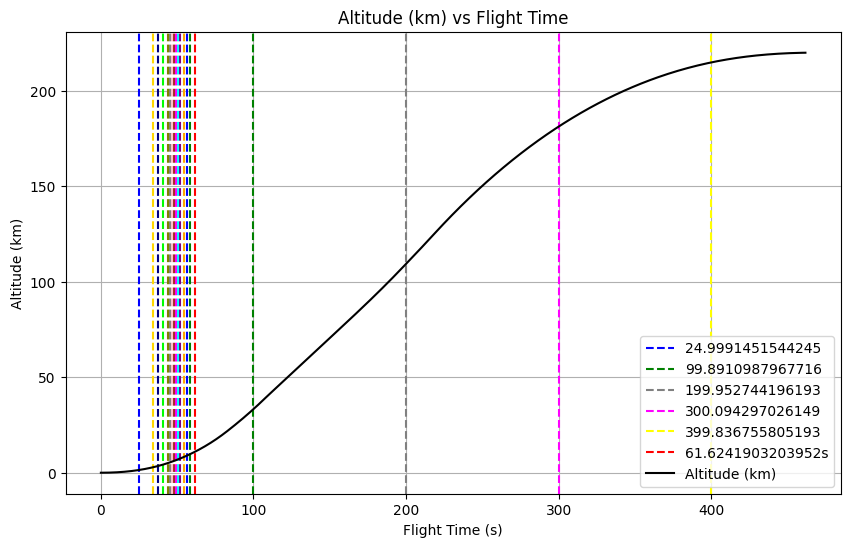

In [36]:
def plot_column(column_name):
    if column_name not in data.columns:
        print(f"Column '{column_name}' does not exist in the data.")
        return

    plt.figure(figsize=(10, 6))
    #plt.axvline(x=qmax_time, color='red', linestyle='--', label=data['Flight Time (s)'].iloc[qmax_index])
    plt.axvline(x=data['Flight Time (s)'].iloc[561], color='blue', linestyle='--', label=data['Flight Time (s)'].iloc[561])
    plt.axvline(x=data['Flight Time (s)'].iloc[1206], color='green', linestyle='--', label=data['Flight Time (s)'].iloc[1206])
    plt.axvline(x=data['Flight Time (s)'].iloc[1794], color='gray', linestyle='--', label=data['Flight Time (s)'].iloc[1794])
    plt.axvline(x=data['Flight Time (s)'].iloc[2255], color='magenta', linestyle='--', label=data['Flight Time (s)'].iloc[2255])
    plt.axvline(x=data['Flight Time (s)'].iloc[2382], color='yellow', linestyle='--', label=data['Flight Time (s)'].iloc[2382])
    
    indices = [1054, 1041, 1034, 1026, 1015, 1010, 1006, 1000, 993, 988, 983, 972, 960, 946]

    colors = plt.cm.viridis(np.linspace(0, 1, len(indices)))
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'pink', 'gray', 'olive', 'lime', 'navy', 'gold']
    for i, (index, color) in enumerate(zip(indices, colors)):
        flight_time = data['Flight Time (s)'].iloc[index]
        plt.axvline(x=flight_time, color=color, linestyle='--', 
                label=f'{flight_time}s' if i == 0 else "")

    if(column_name=='Mach Number'):
        plt.axhline(y=1.0, color='black', linestyle='--', label='Mach = 1')
    plt.plot(data['Flight Time (s)'], data[column_name], label=column_name, c='k')
    plt.xlabel('Flight Time (s)')
    plt.ylabel(column_name)
    plt.title(f'{column_name} vs Flight Time')
    plt.grid(True)
    plt.legend()
    plt.savefig(column_name+'.eps')
    plt.show()

plot_column('Mach Number')
plot_column('Dynamic Pressure (Kpa)')
plot_column('AoA (in pitch)(deg)')
plot_column('AoA (total)(deg)')
plot_column('Re')
plot_column('P')
plot_column('rho')
plot_column('T')
plot_column('mu')
plot_column('Altitude (km)')